In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import sklearn.linear_model as LM
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import make_regression
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('药物研究.txt')
le = LabelEncoder()
le.fit(data["Sex"])
data["SexC"]=le.transform(data["Sex"])
data["BPC"]=le.fit(data["BP"]).transform(data["BP"])
data["CholesterolC"]=le.fit(data["Cholesterol"]).transform(data["Cholesterol"])
data["Na/K"]=data["Na"]/data["K"]
data.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug,SexC,BPC,CholesterolC,Na/K
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY,0,0,0,25.354629
1,47,M,LOW,HIGH,0.739309,0.056468,drugC,1,1,0,13.092530
2,47,M,LOW,HIGH,0.697269,0.068944,drugC,1,1,0,10.113556
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX,0,2,0,7.797618
4,61,F,LOW,HIGH,0.559294,0.030998,drugY,0,1,0,18.042906


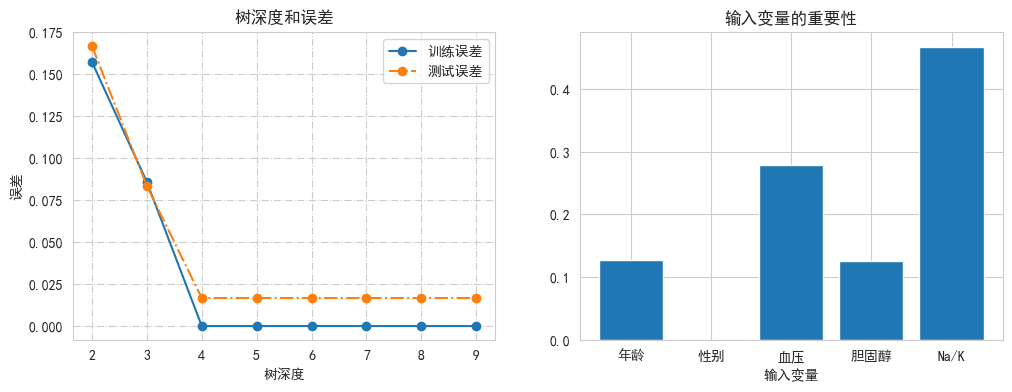

In [3]:
X=data[['Age','SexC','BPC','CholesterolC','Na/K']]
Y=data['Drug']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)
trainErr=[]
testErr=[]
K=np.arange(2,10)
for k in K:
    modelDTC = tree.DecisionTreeClassifier(max_depth=k,random_state=123)
    modelDTC.fit(X_train,Y_train)
    trainErr.append(1-modelDTC.score(X_train,Y_train))
    testErr.append(1-modelDTC.score(X_test,Y_test))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].grid(True, linestyle='-.')
axes[0].plot(np.arange(2,10),trainErr,label="训练误差",marker='o',linestyle='-')
axes[0].plot(np.arange(2,10),testErr,label="测试误差",marker='o',linestyle='-.')
axes[0].set_xlabel("树深度")
axes[0].set_ylabel("误差")
axes[0].set_title('树深度和误差')
axes[0].legend()

bestK=K[testErr.index(np.min(testErr))]
modelDTC = tree.DecisionTreeClassifier(max_depth=bestK,random_state=123)
modelDTC.fit(X_train,Y_train)
axes[1].bar(np.arange(5),modelDTC.feature_importances_)
axes[1].set_title('输入变量的重要性')
axes[1].set_xlabel('输入变量')
axes[1].set_xticks(np.arange(5))
axes[1].set_xticklabels(['年龄','性别','血压','胆固醇','Na/K'])
plt.show()


In [4]:
print("模型的评价：\n",classification_report(Y,modelDTC.predict(X)))
print(tree.export_text(modelDTC))


模型的评价：
               precision    recall  f1-score   support

       drugA       1.00      0.96      0.98        23
       drugB       0.94      1.00      0.97        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      1.00      1.00        54
       drugY       1.00      1.00      1.00        91

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200

|--- feature_4 <= 14.83
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 49.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  49.50
|   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: drugX
|--- feature_4 >  14.83
|   |--- class: drugY



In [5]:
?tree.DecisionTreeClassifier